In [1]:
%load_ext autoreload
%autoreload 1
%aimport resource_networks
%aimport network_manipulation 


from resource_networks import *
from network_manipulation import *

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib notebook

import scipy
# import plotly.graph_objs as go
# import plotly.express as px

In [49]:
def plot_3d_resource(G, W, n, normalize=False, length=1):
    Q = np.asarray(np.meshgrid(np.linspace(0, W, n), np.linspace(0, W, n)))
    Q = Q[:,Q.sum(axis=0) <= W]
    Q = np.concatenate((Q, (W - Q.sum(axis=0)).reshape((1,-1))), axis=0)
    SQ = np.apply_along_axis(G.S, 0, Q)
    dSQ = SQ - Q
    norm = matplotlib.colors.Normalize()
    colormap = matplotlib.cm.jet
    colors = np.linalg.norm(dSQ, axis=0)
    ax = plt.figure(figsize=(7, 5)).add_subplot(projection='3d')
    ax.view_init(elev=33, azim=45)
    ax.quiver(*Q, *dSQ, arrow_length_ratio=0.2, color=colormap(norm(colors)),
             normalize=normalize, length=length)

In [42]:
G = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 4, 5],
    [0, 0, 4],
    [3, 0, 0]
]), create_using=nx.DiGraph))
sim = G.run_simulation([2, 2, 1])
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output()), _dom_classes=('widg…

<IPython.core.display.Javascript object>


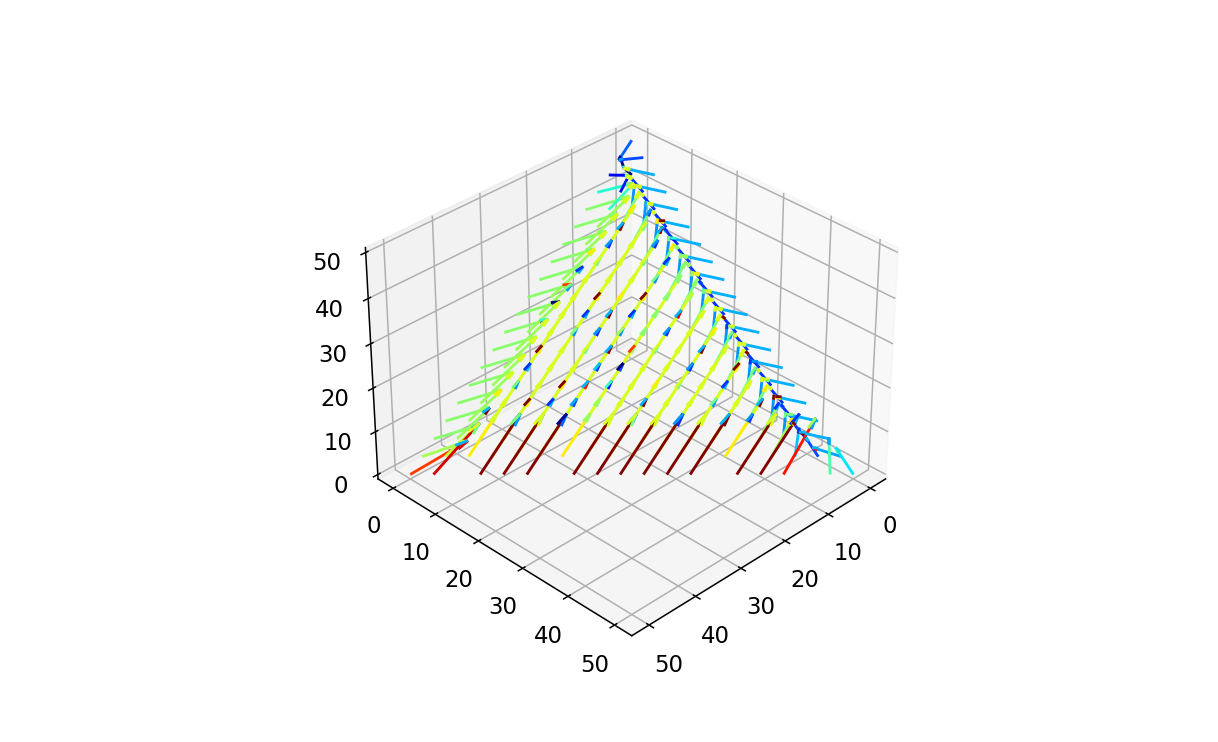

In [58]:
plot_3d_resource(G, W=50, n=20, normalize=False, length=1)

$$S(q) - q = 0$$

In [2]:
import sympy as sp

In [5]:
x = sp.Matrix(sp.symarray('x', (2,2)))
x
# x[0] = 0#sp.symbols('lambda')
# M = sp.Matrix([
#     [x[0], 1, 0],
#     [0, x[0], 1],
#     [0, 0, x[0]]
# ])
# n = sp.Symbol('n')
# display('M:',M, 'M**2', M**2)

Matrix([
[x_0_0, x_0_1],
[x_1_0, x_1_1]])

In [6]:
x**-1

Matrix([
[ x_1_1/(x_0_0*x_1_1 - x_0_1*x_1_0), -x_0_1/(x_0_0*x_1_1 - x_0_1*x_1_0)],
[-x_1_0/(x_0_0*x_1_1 - x_0_1*x_1_0),  x_0_0/(x_0_0*x_1_1 - x_0_1*x_1_0)]])

In [78]:
sp.Matrix(sp.BlockDiagMatrix(M, M))**n

Matrix([
[lambda**n, lambda**(n - 1)*n, lambda**(n - 2)*n*(n - 1)/2,         0,                 0,                           0],
[        0,         lambda**n,           lambda**(n - 1)*n,         0,                 0,                           0],
[        0,                 0,                   lambda**n,         0,                 0,                           0],
[        0,                 0,                           0, lambda**n, lambda**(n - 1)*n, lambda**(n - 2)*n*(n - 1)/2],
[        0,                 0,                           0,         0,         lambda**n,           lambda**(n - 1)*n],
[        0,                 0,                           0,         0,                 0,                   lambda**n]])